# Case Study 2: fuel economy data

`fuel economy`: The fuel economy of an automobile is the fuel efficiency relationship between the distance traveled and the amount of fuel consumed by the vehicle. Consumption can be expressed in terms of 
- volume of fuel to travel a distance, 
- or the distance travelled per unit volume of fuel consumed.

we will analyze data for 2008 and 2018

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Datasets

In [2]:
df_08 = pd.read_csv("all_alpha_08.csv")
df_18 = pd.read_csv("all_alpha_18.csv")

In [3]:
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [4]:
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [5]:
df_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [6]:
df_18.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')

- here is a bried description of some of the columns in the dataset (based on the documentation):
    - `Model`: car model
    - `Displ`: engine displacement in liters
    - `Cyl`: number of engine cylinders
    - `Trans`: transmission type
    - `Drive`: drive axle: 4-wheel drive (4WD)/all-wheel drive, front-wheel drive (FWD), rear-wheel drive (RWD)
    - `Fuel`: fuel type
    - `Cert Region`: certification region
    - `Stnd`: vehicle emissions standard code
    - `Stnd Description`: vehicle emissions standard description
    - `Underhood ID`: engine family or test group ID
    - `Veh Class`: vehicle class
    - `Air Pollution Score`: air pollution score
    - `City MPG`: city miles per gallon
    - `Hwy MPG`: highway miles per gallon
    - `Cmb MPG`: combined miles per gallon (combined city and highway)
    - `Greenhouse Gas Score`: greenhouse gas score
    - `SmartWay`: yes, no, or elite
    - `Comb CO2`: combined co2 in grams per mile
    

## 1- asking questions

we already have the data so we need to ask questions about it

- Q1: Are more unique models using alternative sources of fuel? By how much?
- Q2: How much have vehicle classes improved in fuel economy?
- Q3: What are the characteristics of SmartWay vehicles?
- Q4: What features are associated with better fuel economy?
- Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

## 2- Assessing Data

### Missing values

In [7]:
df_08.shape, df_18.shape

((2404, 18), (1611, 18))

In [8]:
df_08.isnull().sum(axis=0)

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [9]:
df_18.isnull().sum(axis=0)

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

### Duplicates

In [10]:
df_08.duplicated().sum()

25

In [11]:
df_18.duplicated().sum()

0

### Incorrect data types

In [12]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [13]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

In [14]:
df_08["Cyl"].unique()

array(['(6 cyl)', '(4 cyl)', '(12 cyl)', '(8 cyl)', '(10 cyl)',
       '(16 cyl)', '(5 cyl)', nan, '(2 cyl)'], dtype=object)

In [96]:
df_18["cyl"].unique()

array([ 6.,  4.,  5., 12., 16.,  8.,  3.])

In [15]:
df_08["Air Pollution Score"].unique()

array(['7', '6', '9.5', '3', '7/7', '6/6', '2', '3/3', '1', '0', '8', '9',
       '6/4'], dtype=object)

In [16]:
df_08["City MPG"].unique()

array(['15', '17', '16', '18', '19', '20', '10', '11', '12', '13', '21',
       '22', '14', '23', '9', '8', '11/14', '24', '9/12', nan, '14/18',
       '13/18', '11/15', '12/16', '10/13', '9/14', '9/13', '13/19',
       '11/17', '34', '29', '10/14', '25', '26', '40', '27', '28', '35',
       '33', '48'], dtype=object)

In [17]:
df_08["Hwy MPG"].unique()

array(['20', '22', '24', '26', '27', '28', '16', '18', '17', '19', '29',
       '25', '30', '23', '21', '31', '15', '14', '15/20', '14/19', '32',
       '34', '33', '12/16', nan, '21/29', '20/28', '17/23', '12/17',
       '12/19', '20/27', '19/26', '17/24', '12/18', '16/23', '13/18',
       '35', '36', '45', '13/19', '13', '19/25', '13/17', '37'],
      dtype=object)

In [18]:
df_08["Cmb MPG"].unique()

array(['17', '19', '21', '20', '22', '23', '12', '13', '15', '24', '25',
       '18', '16', '14', '26', '11', '10', '12/16', '27', '10/14', nan,
       '16/22', '16/21', '13/17', '14/19', '11/15', '10/15', '15/21',
       '13/19', '13/18', '32', '28', '12/15', '29', '42', '30', '31',
       '34', '46'], dtype=object)

In [19]:
df_08["Greenhouse Gas Score"].unique()

array(['4', '5', '6', '7', '0', '1', '3', '2', '8', '6/4', '4/2', nan,
       '8/6', '7/5', '5/3', '4/3', '7/6', '6/5', '9', '6/3', '10'],
      dtype=object)

In [95]:
df_18["Greenhouse Gas Score"].unique()

array([ 5,  4,  6,  7,  2,  1, 10,  3,  9,  8], dtype=int64)

In [20]:
df_18["City MPG"].unique()

array(['20', '19', '23', '21', '24', '17', '22', '26', '25', '27', '12',
       '9', '28/66', '27/70', '27/66', '16', '25/62', '18', '14', '15',
       '13', '29', '31', '30', '28', '14/18', '49', '12/18', '12/17',
       '12/16', '11/16', '43/113', '14/19', '13/18', '43/102', '43',
       '15/20', '33', '32', '15/21', '14/21', '20/59', '124', '10',
       '17/24', '17/23', '28/63', '37', '35', '40', '51', '44', '48',
       '34', '9/13', '26/70', '26/60', '26/63'], dtype=object)

In [21]:
df_18["Hwy MPG"].unique()

array(['28', '27', '33', '32', '30', '29', '34', '24', '31', '35', '37',
       '25', '19', '14', '34/78', '31/75', '31/68', '29/68', '26', '22',
       '20', '23', '21', '15', '18', '40', '47', '52', '38', '45', '48',
       '39', '20/28', '36', '43', '16/24', '15/22', '17/23', '16/22',
       '42/99', '22/30', '20/27', '18/25', '16', '17', '41/91', '41',
       '19/27', '42', '21/28', '21/61', '93', '24/32', '23/31', '17/22',
       '27/66', '53', '13/17', '12/17', '33/72', '28/58', '30/61'],
      dtype=object)

In [22]:
df_18["Cmb MPG"].unique()

array(['23', '22', '27', '24', '28', '20', '26', '29', '25', '31', '21',
       '15', '11', '30/71', '29/72', '28/67', '19', '27/64', '16', '17',
       '30', '18', '32', '33', '37', '35', '16/22', '46', '14/20',
       '13/19', '14/19', '12/18', '13/18', '42/106', '17/23', '16/21',
       '13', '42/97', '42', '34', '36', '18/25', '20/60', '108', '12',
       '20/27', '19/26', '27/65', '39', '14', '40', '52', '10/14',
       '10/15', '29/71', '26/59', '27/62'], dtype=object)

In [23]:
df_08["SmartWay"].unique()

array(['no', 'yes'], dtype=object)

In [24]:
df_18["SmartWay"].unique()

array(['No', 'Yes', 'Elite'], dtype=object)

- for 2008 dataset
    - `cyl` column is a string and should be an int
    - `air_pollution_score` is a string and should be a float
    -  `city_mpg`, `hwy_mpg`, `cmb_mpg` columns are strings and should be floats
    - `greenhouse_gas_score` is a string and should be an int
- for 2018 dataset
    - `cyl` column is a float and should be an int
    - `city_mpg`, `hwy_mpg`, `cmb_mpg` columns are strings and should be floats

    

### checking the comparability of the datasets 
- this is important because we will compare the two datasets in the analysis and merge them in one dataframe
- this includes unifying the same columns with different names -to be of the same name- and unifying the values of the same columns -to be of the same format- as well

In [25]:
df_08["Sales Area"].unique()

array(['CA', 'FA', 'FC'], dtype=object)

In [26]:
df_18["Cert Region"].unique()

array(['FA', 'CA'], dtype=object)

- `sales_area` in 2008 and `cert_region` in 2018 are the same so we can unify them

In [27]:
df_08["Trans"].unique()

array(['Auto-S5', 'Man-6', 'Auto-S6', 'Auto-AV', 'Auto-S7', 'Auto-L4',
       'Auto-L6', 'Auto-4', 'Man-5', 'Auto-L5', nan, 'Auto-6', 'S8',
       'Auto-S4', 'Auto-L7'], dtype=object)

In [28]:
df_18["Trans"].unique()

array(['SemiAuto-6', 'AMS-8', 'SemiAuto-9', 'AutoMan-6', 'Auto-8',
       'AMS-6', 'AMS-7', 'Man-6', 'SemiAuto-8', 'SemiAuto-7', 'Auto-6',
       'Auto-10', 'SemiAuto-10', 'Man-7', 'Auto-9', 'CVT', 'Auto-4',
       'AutoMan-7', 'SCV-7', 'Auto-1', 'SCV-10', 'Auto-7', 'Man-5',
       'SCV-8', 'SCV-6', 'SemiAuto-5'], dtype=object)

- this is an example of the values that will need to be of the same format

In [29]:
df_08["Fuel"].unique()

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

In [30]:
df_18["Fuel"].unique()

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas',
       'Electricity'], dtype=object)

- another example of the same column in both datasets
- but we see that there are some differences
    - 2008 contains CNG and ethanol
    - 2018 contains Electricity and Electricity/gasoline
- so we need to unify them

## Data Cleaning

### drop unwanted and strange columns

In [31]:
set(df_08) - set(df_18), set(df_18) - set(df_08)

({'FE Calc Appr', 'Sales Area', 'Unadj Cmb MPG'},
 {'Cert Region', 'Comb CO2', 'Stnd Description'})

In [32]:
set(df_08).intersection(set(df_18))

{'Air Pollution Score',
 'City MPG',
 'Cmb MPG',
 'Cyl',
 'Displ',
 'Drive',
 'Fuel',
 'Greenhouse Gas Score',
 'Hwy MPG',
 'Model',
 'SmartWay',
 'Stnd',
 'Trans',
 'Underhood ID',
 'Veh Class'}

- we will drop `FE Calc Appr`, `Unadj Cmb MPG` columns from 2008 dataset because they are not needed not common for both datasets
- we will drop `Stnd Description` , `Comb CO2` columns from 2018 dataset because they are not needed not common for both datasets
- we will drop `Stnd`, `Underhood ID`, from both datasets because they are not needed for our analysis

In [33]:
df_08.drop(columns=['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'],inplace=True)

In [34]:
df_18.drop(columns=['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'],inplace=True)

### Unify column names 
- we will change `sales_area` column name in 2008 dataset to be `cert_region` to be the same as 2018 dataset

In [40]:
df_08.rename(columns={"Sales Area":"Cert Region"}, inplace=True)

- convert all column names to lowercase and replace spaces with underscores
    - (Underscores can be much easier to work with in Python than spaces. For example, having spaces wouldn't allow you to use df.column_name instead of df['column_name'] to select columns or use query(). Being consistent with lowercase and underscores also helps make column names easy to remember.)

In [47]:
columns_08 = df_08.columns.array

In [55]:
columns_08 = []
for column in df_08.columns:
    columns_08.append(column.lower().replace(" ","_"))

columns_18 = []
for column in df_18.columns:
    columns_18.append(column.lower().replace(" ","_"))

In [59]:
df_08.columns = columns_08
df_18.columns = columns_18

In [61]:
# we could have ussd this code as well if we will just make some transformation on the column name and that's it
#df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [63]:
(df_08.columns == df_18.columns).all()

True

- now all the columns in both datasets are the same

In [64]:
df_08.to_csv("data_08_v1.csv", index=False)
df_18.to_csv("data_18_v1.csv", index=False)

### Unify the values
- for consistency, we will compare the cars certified by california in both datasets

In [65]:
df_08.cert_region.unique()

array(['CA', 'FA', 'FC'], dtype=object)

In [66]:
df_18.cert_region.unique()

array(['FA', 'CA'], dtype=object)

- mine: we could drop FC and ZEV from 2008 dataset and leave the rest

In [68]:
df_08 = df_08[df_08["cert_region"] == "CA"]

In [70]:
df_18 = df_18[df_18["cert_region"] == "CA"]

In [71]:
df_08.cert_region.unique(), df_18.cert_region.unique()

(array(['CA'], dtype=object), array(['CA'], dtype=object))

- now drop that column from both datasets since it has only one value now

In [ ]:
df_08.drop(columns=["cert_region"], inplace=True)
df_18.drop(columns=["cert_region"], inplace=True)

### Drop rows with missing values

In [78]:
df_08.dropna(inplace=True)
df_18.dropna(inplace=True)

### Drop duplicates

In [82]:
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [83]:
df_08.to_csv("data_08_v2.csv", index=False)
df_18.to_csv("data_18_v2.csv", index=False)

In [85]:
df_08.shape, df_18.shape

((986, 13), (794, 13))

### Fixing data types

- we said we need to fix the data types of the following columns
    - `cyl` column is a string and should be an int
    - `air_pollution_score` is a string and should be a float
    -  `city_mpg`, `hwy_mpg`, `cmb_mpg` columns are strings and should be floats
    - `greenhouse_gas_score` is a string and should be an int
- for 2018 dataset
    - `cyl` column is a float and should be an int
    - `city_mpg`, `hwy_mpg`, `cmb_mpg` columns are strings and should be floats 

- notice that as we fix the datatype of a column we ensure the consistency on the same column in the other dataset

#### Fix `Cyl` data type

In [3]:
df_08.cyl.unique()

array(['(6 cyl)', '(4 cyl)', '(12 cyl)', '(8 cyl)', '(10 cyl)',
       '(16 cyl)', '(5 cyl)', '(2 cyl)'], dtype=object)

- we need to extract the number then convert to int

In [4]:
df_08.cyl = df_08.cyl.map(lambda x: int(x[1:-4].strip()))

In [5]:
df_08.cyl.dtype

dtype('int64')

- convert 2018 dataset to be int as well for consistency

In [6]:
df_18.cyl = df_18.cyl.astype(np.int64)

In [7]:
df_18.cyl.dtype

dtype('int64')

#### Fix `air_pollution_score` data type

In [48]:
df_18.air_pollution_score = df_18.air_pollution_score.astype("float")

In [9]:
df_08.air_pollution_score.unique()

array(['7', '6', '9.5', '9', '6/4'], dtype=object)

In [11]:
try:
    df_08.air_pollution_score.astype(float)
except Exception as e:
    print(e)

could not convert string to float: '6/4'


- notice there are strange values like `6/4` 

In [12]:
df_08.query("air_pollution_score == '6/4'")

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


- if we check the documentations, we will see that if a vehicle has more than one fuel type, the values are separated by `/` for each fuel type
- we notice from assessment that this isn't only for `air_pollution_score` but also for `city_mpg`, `hwy_mpg`, `cmb_mpg`, `greenhouse_gas_score of 2008`

In [16]:
df_08["fuel"].str.contains("/")

0      False
1      False
2      False
3      False
4      False
       ...  
981    False
982    False
983    False
984    False
985    False
Name: fuel, Length: 986, dtype: bool

In [22]:
hybrid_08 = df_08[df_08["fuel"].str.contains("/")]
hybrid_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [23]:
hybrid_18 = df_18[df_18["fuel"].str.contains("/")]
hybrid_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
195,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
196,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
197,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
212,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
214,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


- notice the usage of `.str` which is an attribute that can be used with string columns to apply string methods to all elements in the column

- now we want to split these into 2 rows for each fuel type

In [24]:
df1 = hybrid_08.copy()
df2 = hybrid_08.copy()

In [26]:
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']
for column in split_columns:
    df1[column] = df1[column].apply(lambda x: x.split("/")[0])
    df2[column] = df2[column].apply(lambda x: x.split("/")[1])

In [27]:
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [28]:
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [33]:
new_rows = pd.concat([df1,df2])
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [35]:
# drop the original hybrid rows as they are not needed anymore 
df_08.drop(hybrid_08.index, inplace=True)

In [39]:
# append the new rows 
df_08 = pd.concat([df_08,new_rows],ignore_index=True)

In [41]:
df_08["fuel"].str.contains("/").any()

False

In [69]:
# now we can convert it easily
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)

- now repeat the same thing for 2018 dataset

In [42]:
df1 = hybrid_18.copy()
df2 = hybrid_18.copy()

In [50]:
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']
for column in split_columns:
    df1[column] = df1[column].apply(lambda x: x.split("/")[0])
    df2[column] = df2[column].apply(lambda x: x.split("/")[1])

In [51]:
# append the splitted rows below each other 
new_rows = pd.concat([df1,df2])


# drop the hybrid rows from the original dataset
df_18.drop(hybrid_18.index, inplace=True)

# append the new rows to the end of the original dataset
df_18 = pd.concat([df_18,new_rows],ignore_index=True)

In [53]:
df_18.fuel.str.contains("/").any()

False

In [56]:
df_18.to_csv("data_18_v3.csv", index=False)
df_08.to_csv("data_08_v3.csv", index=False)

#### Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes
- we have already splitted them so it will be straight forward

In [61]:
mpg_columns = ['city_mpg','hwy_mpg','cmb_mpg']
for c in mpg_columns:
    df_08[c] = df_08[c].astype(float)
    df_18[c] = df_18[c].astype(float)

#### Fix `greenhouse_gas_score` data type

In [66]:
df_18.greenhouse_gas_score.dtype

dtype('int64')

In [67]:
df_08.greenhouse_gas_score = df_08.greenhouse_gas_score.astype(np.int64)

#### Making sure everything is fixed

In [70]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [71]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [72]:
df_08.dtypes == df_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

In [73]:
df_18.to_csv("clean_18.csv", index=False)
df_08.to_csv("clean_08.csv", index=False)

## Exploratory Data Analysis

In [2]:
df_08 = pd.read_csv("clean_08.csv")
df_18 = pd.read_csv("clean_18.csv")

- let's start with basic visualizations on the distributions of the features and their correlations with each other

<Axes: >

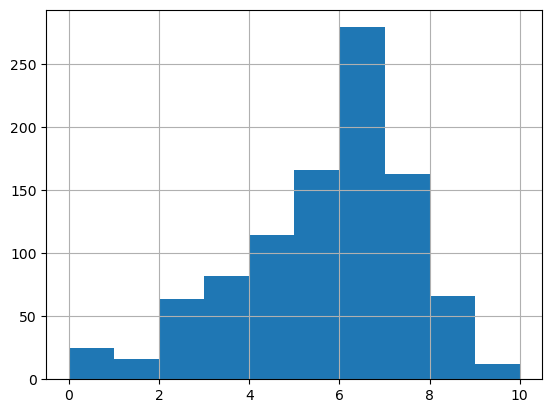

In [3]:
df_08.greenhouse_gas_score.hist()

<Axes: >

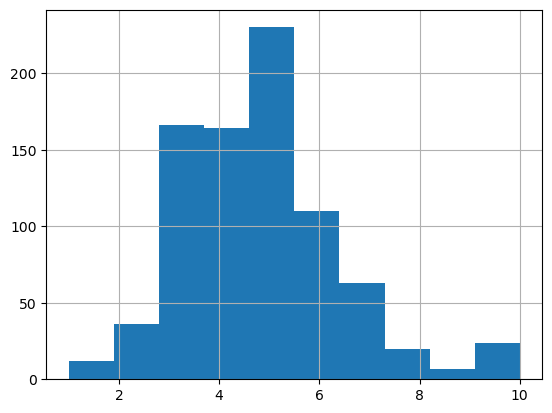

In [4]:
df_18.greenhouse_gas_score.hist()

- green house gas score is equally distributed for 2018 dataset and skewed to the left for 2008 dataset
- mine: if a feature is equally diftributed then its mean can be used to represent the whole feature and draw some insights, otherwise the mean is skewed

<Axes: >

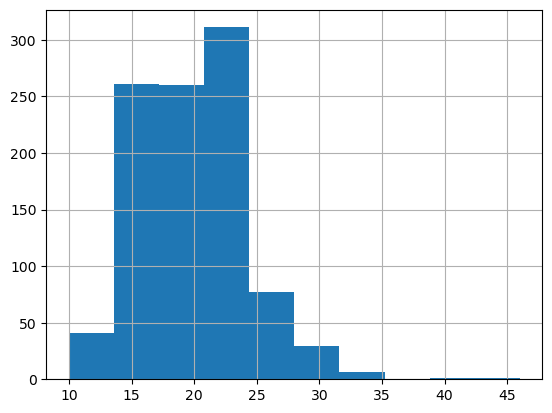

In [5]:
df_08.cmb_mpg.hist()

<Axes: >

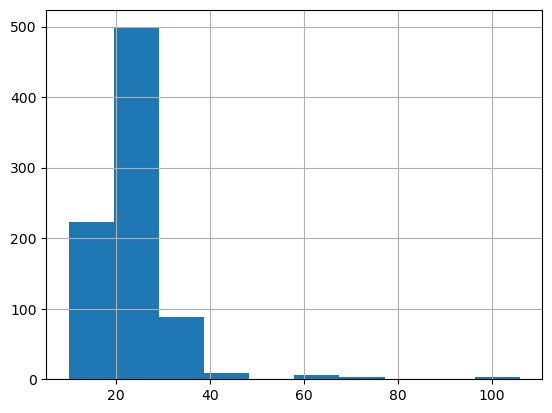

In [6]:
df_18.cmb_mpg.hist(
)

- combined miles per galon is skewed to the right for 2018 dataset

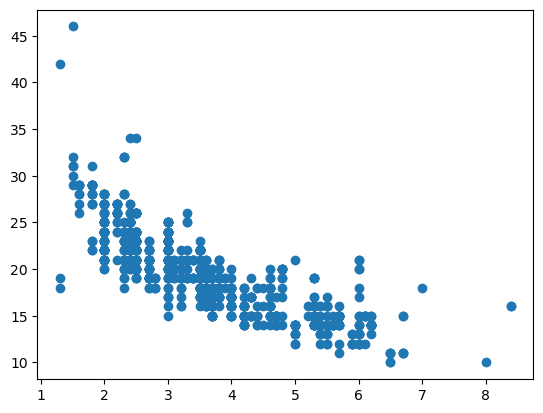

In [7]:
plt.scatter(df_08.displ,df_08.cmb_mpg)

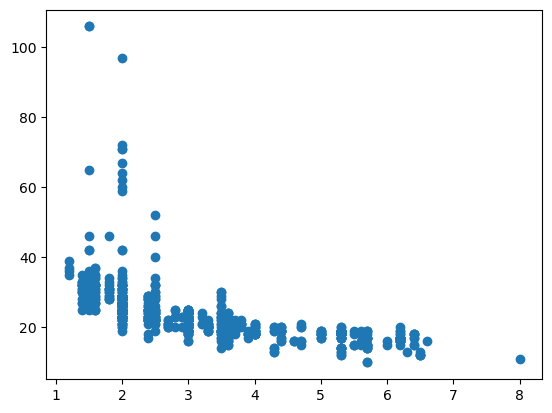

In [8]:
plt.scatter(df_18.displ,df_18.cmb_mpg)

- we see that when `displacement` increases, the combined miles per galon `cmb_mpg` decreases

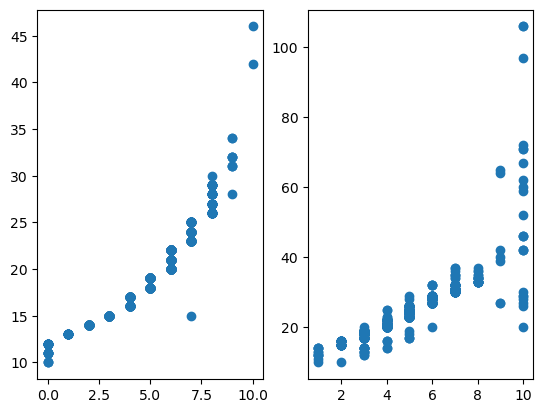

In [90]:
fig, axs = plt.subplots(1,2)
axs[0].scatter(df_08.greenhouse_gas_score,df_08.cmb_mpg)
axs[1].scatter(df_18.greenhouse_gas_score,df_18.cmb_mpg)

- we see that when `greenhouse_gas_score` increases, the combined miles per galon `cmb_mpg` increases, which means the 2 metrics are positively correlated which makes sense

## Drawing Conclusions

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [9]:
models_fuel_08 = df_08.groupby(["fuel"])["model"].unique().apply(lambda x: len(x))
models_fuel_08

fuel
CNG           1
Gasoline    376
ethanol       1
gas           1
Name: model, dtype: int64

In [10]:
models_fuel_18 = df_18.groupby(["fuel"])["model"].unique().apply(lambda x: len(x))
models_fuel_18

fuel
Diesel          11
Electricity     10
Ethanol         16
Gas             16
Gasoline       355
Name: model, dtype: int64

In [11]:
models_fuel_08.index = models_fuel_08.index.str.lower()
models_fuel_18.index = models_fuel_18.index.str.lower()

In [12]:
combined_labels = set(models_fuel_08.index).union(set(models_fuel_18.index))

for label in combined_labels:
    if not label in models_fuel_08:
        models_fuel_08[label] = 0
    if not label in models_fuel_18:
        models_fuel_18[label] = 0

- drop `gas`, `diesel` and `gasoline` since we are only interested in the alternative sources of energy

In [13]:
models_fuel_18.sort_index(inplace=True)

In [14]:
models_fuel_08.sort_index(inplace=True)

In [15]:
fossile_fuels = ["gas","diesel","gasoline"]
models_fuel_08.drop(fossile_fuels, inplace=True)
models_fuel_18.drop(fossile_fuels, inplace=True)

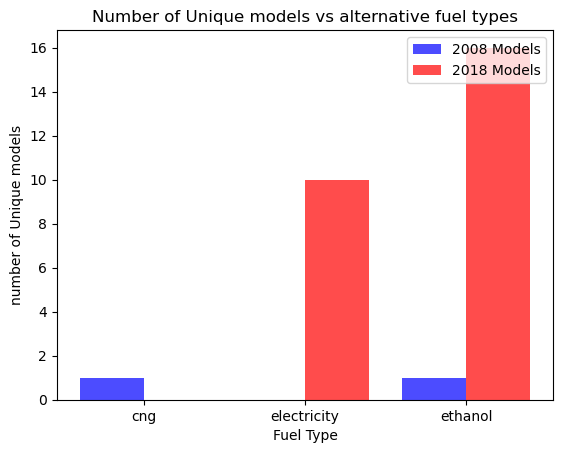

In [32]:
# Create an array of x positions for each bar
locations = np.arange(len(models_fuel_08))

width = 0.4  # width of the bars

plt.bar(locations - width/2, models_fuel_08, width=width, color='b', alpha=0.7, label='2008 Models')
plt.bar(locations + width/2, models_fuel_18, width=width, color='r', alpha=0.7, label='2018 Models')

# Replace numerical x-axis labels with actual category labels
plt.xticks(locations, models_fuel_08.index)

plt.xlabel('Fuel Type')
plt.ylabel('number of Unique models')
plt.title('Number of Unique models vs alternative fuel types')
plt.legend(loc='upper right')
plt.show()

### Q2: How much have vehicle classes improved in fuel economy?

In [27]:
fuel_economy_cols = ["city_mpg","hwy_mpg","cmb_mpg"]
classes_mpgs_08 = df_08.groupby("veh_class")[fuel_economy_cols].mean()
classes_mpgs_08

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
SUV,16.507143,21.935714,18.471429
large car,15.836364,23.345455,18.509091
midsize car,18.826087,26.565217,21.601449
minivan,16.882353,23.705882,19.117647
pickup,14.578313,19.204819,16.277108
small car,18.372372,25.963964,21.105105
station wagon,19.633333,27.116667,22.366667
van,13.142857,17.333333,14.952381


In [28]:
classes_mpgs_18 = df_18.groupby("veh_class")[fuel_economy_cols].mean()
classes_mpgs_18

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
large car,20.420455,28.795455,23.409091
midsize car,24.862319,33.057971,27.884058
minivan,18.000000,25.400000,20.800000
pickup,16.551282,22.012821,18.589744
small SUV,21.666667,27.879630,24.074074
small car,22.561404,30.435088,25.421053
special purpose,16.600000,21.300000,18.500000
standard SUV,16.011628,21.953488,18.197674
station wagon,24.705882,32.058824,27.529412


In [41]:
classes_mpgs_18.rename({"standard SUV":"SUV"},inplace=True)

In [43]:
set(classes_mpgs_08.index) - set(classes_mpgs_18.index)

{'van'}

In [44]:
set(classes_mpgs_18.index) - set(classes_mpgs_08.index)

{'small SUV', 'special purpose'}

In [49]:
# drop the labels that are not common
classes_mpgs_08.drop(set(classes_mpgs_08.index) - set(classes_mpgs_18.index),inplace=True)
classes_mpgs_18.drop(set(classes_mpgs_18.index) - set(classes_mpgs_08.index),inplace=True)

In [54]:
classes_mpgs_08.sort_index(inplace=True)
classes_mpgs_18.sort_index(inplace=True)

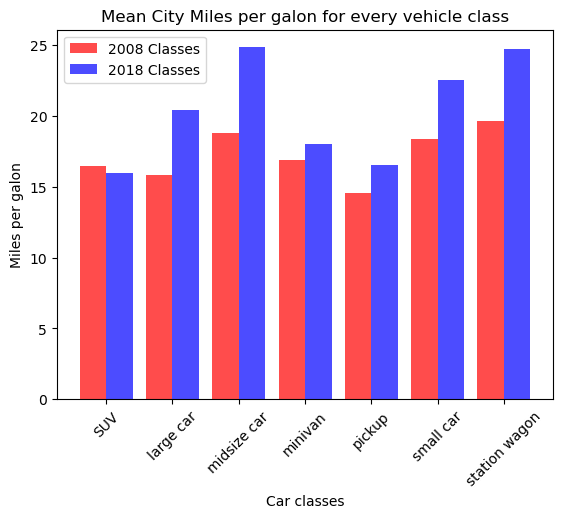

In [67]:
locations = np.arange(len(classes_mpgs_08))
width = 0.4
plt.bar(locations - width / 2, height=classes_mpgs_08["city_mpg"], width=width, color='r', alpha=0.7, label='2008 Classes')
plt.bar(locations + width / 2, height=classes_mpgs_18["city_mpg"], width=width, color='b', alpha=0.7, label='2018 Classes')
plt.legend()

# Replace numerical x-axis labels with actual category labels
plt.xticks(locations, classes_mpgs_08.index, rotation=45)
plt.title("Mean City Miles per galon for every vehicle class")
plt.xlabel("Car classes")
plt.ylabel("Miles per galon");

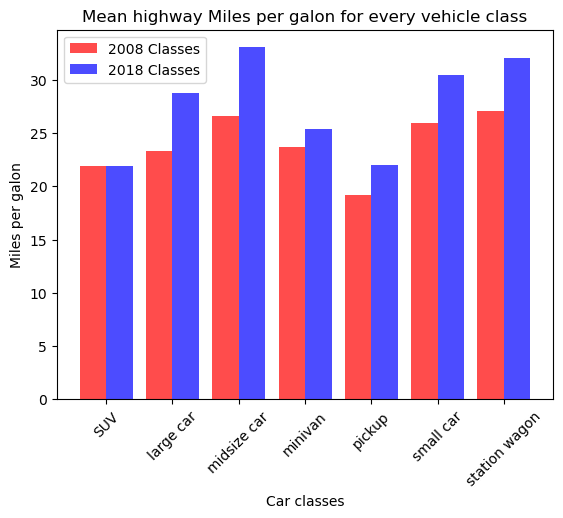

In [68]:
locations = np.arange(len(classes_mpgs_08))
width = 0.4
plt.bar(locations - width / 2, height=classes_mpgs_08["hwy_mpg"], width=width, color='r', alpha=0.7, label='2008 Classes')
plt.bar(locations + width / 2, height=classes_mpgs_18["hwy_mpg"], width=width, color='b', alpha=0.7, label='2018 Classes')
plt.legend()

# Replace numerical x-axis labels with actual category labels
plt.xticks(locations, classes_mpgs_08.index, rotation=45)
plt.title("Mean highway Miles per galon for every vehicle class")
plt.xlabel("Car classes")
plt.ylabel("Miles per galon");

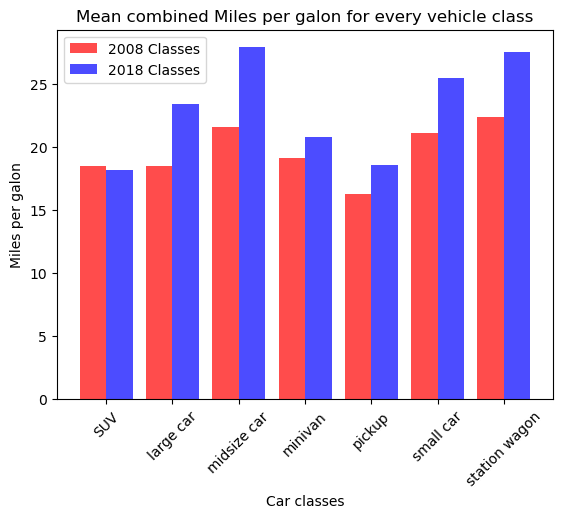

In [69]:
locations = np.arange(len(classes_mpgs_08))
width = 0.4
plt.bar(locations - width / 2, height=classes_mpgs_08["cmb_mpg"], width=width, color='r', alpha=0.7, label='2008 Classes')
plt.bar(locations + width / 2, height=classes_mpgs_18["cmb_mpg"], width=width, color='b', alpha=0.7, label='2018 Classes')
plt.legend()

# Replace numerical x-axis labels with actual category labels
plt.xticks(locations, classes_mpgs_08.index, rotation=45)
plt.title("Mean combined Miles per galon for every vehicle class")
plt.xlabel("Car classes")
plt.ylabel("Miles per galon");

### Q3: What are the characteristics of SmartWay vehicles?

In [70]:
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [71]:
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [81]:
smart_08 = df_08.query("smartway == 'yes'").describe()
smart_08

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [82]:
smart_18 = df_18.query("smartway in ['Yes','Elite'] ").describe()
smart_18

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


In [101]:
normalised_metrics_18 = smart_18.mean()/smart_18.mean().displ
normalised_metrics_08 = smart_08.mean() / smart_08.mean().displ

In [104]:
normalised_metrics_08.drop("displ", inplace=True)
normalised_metrics_18.drop("displ", inplace=True)

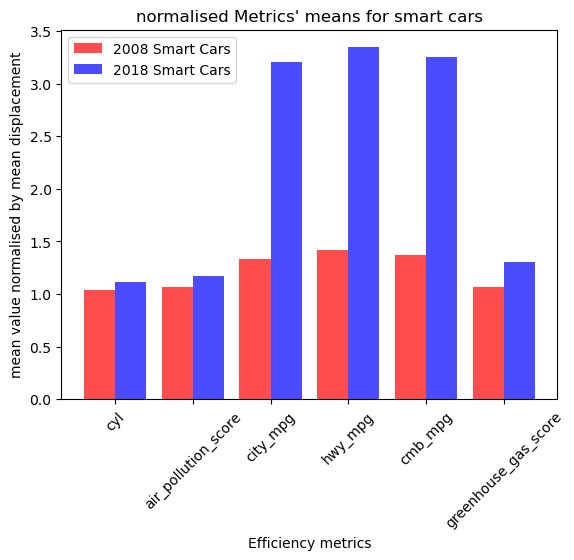

In [114]:
locations = np.arange(len(normalised_metrics_08))
width = 0.4
plt.bar(locations - width / 2, height=normalised_metrics_08, width=width, color='r', alpha=0.7, label='2008 Smart Cars')
plt.bar(locations + width / 2, height=normalised_metrics_18, width=width, color='b', alpha=0.7, label='2018 Smart Cars')
plt.legend()

# Replace numerical x-axis labels with actual category labels
plt.xticks(locations, normalised_metrics_08.index, rotation=45)
plt.title("normalised Metrics' means for smart cars")
plt.xlabel("Efficiency metrics")
plt.ylabel("mean value normalised by mean displacement");

- we conclude that modern smart cars are mostly better in all of the metrics (on average)

### Q4: What features are associated with better fuel economy?

In [115]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [116]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


Text(0.5, 1.0, 'greenhouse gas scores distribution for efficient cars')

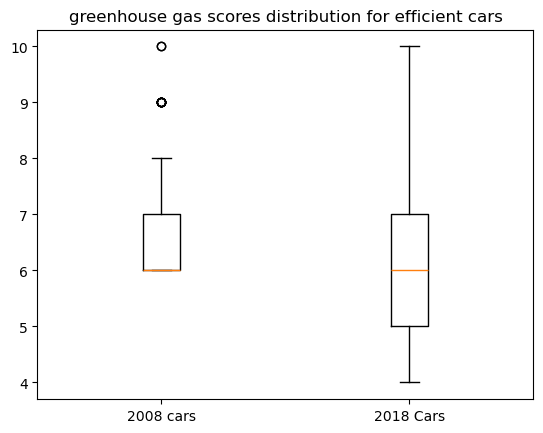

In [143]:
plt.boxplot(top_08["greenhouse_gas_score"],positions=[1],labels=["2008 cars"]);
plt.boxplot(top_18["greenhouse_gas_score"],positions=[2],labels=["2018 Cars"]);
plt.title("greenhouse gas scores distribution for efficient cars")

Text(0.5, 1.0, 'air pollution scores distribution for efficient cars')

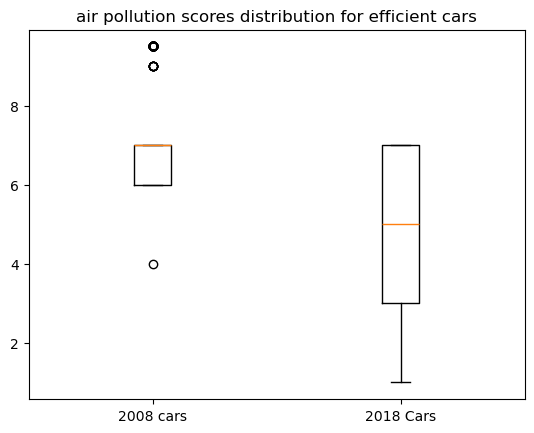

In [142]:
plt.boxplot(top_08["air_pollution_score"],positions=[1],labels=["2008 cars"]);
plt.boxplot(top_18["air_pollution_score"],positions=[2],labels=["2018 Cars"]);
plt.title("air pollution scores distribution for efficient cars")

- we conclude that modern efficient cars have relatively worse air pollution scores and green house gas scores

### Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

- we need a way to compare models that exist in both datasets (so we need to merge them)

#### Types of merges
- so far we have combined dataframes using `Appending`
- there are other types of combining dataframes together using `Merges`
    - it is similar to database-style `Join`

Tip: [comparison between `Pandas` and `SQL`](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html) 

Here are the four types of merges in pandas. Below, "key" refers to common columns in both dataframes that we're joining on.

- Inner Join - Use intersection of keys from both frames
- Outer Join - Use union of keys from both frames.
- Left Join - Use keys from left frame only.
- Right Join - Use keys from right frame only.

Below are diagrams to visualize each type.

![inner-outer](merges.png)
![left-right](merges1.png)

mine: useful link to visualize all sorts of merges in [powerpi](https://community.fabric.microsoft.com/t5/Data-Stories-Gallery/Visualizing-Merge-Join-Types-in-Power-BI/td-p/219906)

#### 1. Rename 2008 columns to distinguish from 2018 columns after the merge

In [146]:
# rename 2008 columns
df_08.rename(columns=lambda x: x + "_2008", inplace=True)

#### 2. Perform inner merge

In [154]:
combined_cars_df = pd.merge(left=df_08,right=df_18,left_on="model_2008",right_on="model",how="inner")
combined_cars_df.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollution_score_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [155]:
combined_cars_df.shape

(922, 26)

In [159]:
combined_cars_df["model_2008"].value_counts()

model_2008
FORD F150                 132
GMC Sierra 15              80
DODGE Charger              40
CHRYSLER 300               35
CHEVROLET Silverado 15     32
                         ... 
AUDI S5                     1
MERCEDES-BENZ SL550         1
MASERATI Granturismo        1
LEXUS LX 570                1
KIA Sedona                  1
Name: count, Length: 72, dtype: int64

In [161]:
df_08.model_2008.value_counts()["FORD F150"]

6

In [162]:
df_18.model.value_counts()["FORD F150"]

22

In [163]:
6*22

132

- mine: since this is not 1:1 relationship, for example there are 6 rows for `Ford F150` in 2008 dataset and 22 rows for `Ford F150` in 2018 dataset
    - so what happened is that each row in 2008 was put in front of each other row in 2018 so 6 * 22 = 132
- that is usually the case when the same key appear more than once in eiher dataset, we make rows out of all possible combinations of matching 

In [166]:
common_models_mpgs = combined_cars_df.groupby("model")[['cmb_mpg_2008','cmb_mpg']].mean()
common_models_mpgs.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


In [168]:
common_models_mpgs["mpg_change"] = common_models_mpgs["cmb_mpg"] - common_models_mpgs["cmb_mpg_2008"]
common_models_mpgs.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


In [176]:
common_models_mpgs.sort_values(by="mpg_change", ascending=False, inplace=True)

In [179]:
best_5 = common_models_mpgs.head()
best_5

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
VOLVO XC 90,15.666667,32.200000,16.533333
CHEVROLET Malibu,22.333333,33.000000,10.666667
CHEVROLET Equinox,19.000000,27.833333,8.833333
AUDI S4,15.500000,24.000000,8.500000
AUDI S5,16.000000,24.000000,8.000000


In [185]:
worst_5 = common_models_mpgs.tail().copy()
worst_5.sort_values(by="mpg_change", inplace=True)

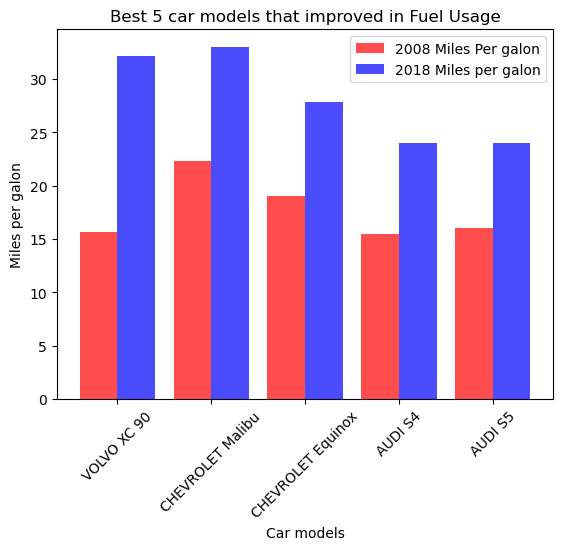

In [186]:
locations = np.arange(len(best_5))
width = 0.4
plt.bar(locations - width / 2, height=best_5["cmb_mpg_2008"], width=width, color='r', alpha=0.7, label='2008 Miles Per galon')
plt.bar(locations + width / 2, height=best_5["cmb_mpg"], width=width, color='b', alpha=0.7, label='2018 Miles per galon')
plt.legend()

# Replace numerical x-axis labels with actual category labels
plt.xticks(locations, best_5.index, rotation=45)
plt.title("Best 5 car models that improved in Fuel Usage")
plt.xlabel("Car models")
plt.ylabel("Miles per galon");

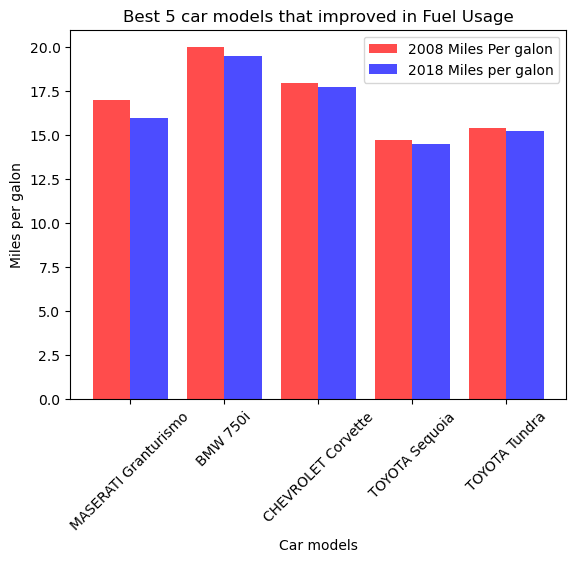

In [187]:
locations = np.arange(len(worst_5))
width = 0.4
plt.bar(locations - width / 2, height=worst_5["cmb_mpg_2008"], width=width, color='r', alpha=0.7, label='2008 Miles Per galon')
plt.bar(locations + width / 2, height=worst_5["cmb_mpg"], width=width, color='b', alpha=0.7, label='2018 Miles per galon')
plt.legend()

# Replace numerical x-axis labels with actual category labels
plt.xticks(locations, worst_5.index, rotation=45)
plt.title("Best 5 car models that improved in Fuel Usage")
plt.xlabel("Car models")
plt.ylabel("Miles per galon");